In [1]:


import tensorflow as tf
from tensorflow. keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv(r'C:\Users\M S I\Downloads\creditcard.csv')
df.drop(columns=['Time'], inplace=True)

missing_values = df.isnull().sum()

# Print column names and missing values
for column, missing_count in missing_values.items():
    print(f"Column: {column}, Missing Values: {missing_count}")


Column: V1, Missing Values: 0
Column: V2, Missing Values: 0
Column: V3, Missing Values: 0
Column: V4, Missing Values: 0
Column: V5, Missing Values: 0
Column: V6, Missing Values: 0
Column: V7, Missing Values: 0
Column: V8, Missing Values: 0
Column: V9, Missing Values: 0
Column: V10, Missing Values: 0
Column: V11, Missing Values: 0
Column: V12, Missing Values: 0
Column: V13, Missing Values: 0
Column: V14, Missing Values: 0
Column: V15, Missing Values: 0
Column: V16, Missing Values: 0
Column: V17, Missing Values: 0
Column: V18, Missing Values: 0
Column: V19, Missing Values: 0
Column: V20, Missing Values: 0
Column: V21, Missing Values: 0
Column: V22, Missing Values: 0
Column: V23, Missing Values: 0
Column: V24, Missing Values: 0
Column: V25, Missing Values: 0
Column: V26, Missing Values: 0
Column: V27, Missing Values: 0
Column: V28, Missing Values: 0
Column: Amount, Missing Values: 0
Column: Class, Missing Values: 0


In [23]:

sc=StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [24]:

df.rename(columns={'Class': 'class'}, inplace=True)
df['class'].value_counts()
df.dropna (subset=['class'], how='any', inplace=True)
df['class'].value_counts()
df['class'].isnull().sum()
# dividing the dataframe into fraud and non fraud data
non_fraud=df[df['class']==0]
fraud=df[df['class']==1]


In [25]:
non_fraud.shape, fraud.shape


((284315, 30), (492, 30))

In [26]:
# now dividing the dataframe into dependent and independent varaible 
X=df.drop(['class'], axis=1)
y = df['class']
# check the shape
df_shape = df.shape
print(df_shape)
X.shape, y.shape


(284807, 30)


((284807, 29), (284807,))

In [27]:
#we will divide the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# check the shape again
X_train.shape, X_test.shape,y_train. shape, y_test.shape


((227845, 29), (56962, 29), (227845,), (56962,))

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and labels
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test .shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [29]:

# Initialize SMOTE
smote = SMOTE(random_state=0)

# Fit SMOTE on the training data
X_train, y_train = smote.fit_resample(X_train_resampled,y_train_resampled)

# Check the shape of the resampled data
print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)


Resampled X_train shape: (454908, 29)
Resampled y_train shape: (454908,)


In [30]:
sum(y_train==0)


227454

In [31]:
sum(y_train==1)



227454

In [32]:
#we will divide the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
# check the shape again
X_train.shape, X_test.shape,y_train. shape, y_test.shape
#scaler


((227845, 29), (56962, 29), (227845,), (56962,))

In [33]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[ 1.14122902, -0.47568893, -0.764995  , ..., -0.09318552,
        -0.19475709, -0.32629643],
       [-0.2066029 , -0.24083681,  0.15937772, ...,  0.72840879,
         0.57064094, -0.10435298],
       [-0.26506311,  0.69016649,  0.77671719, ...,  0.38176981,
         0.3240535 , -0.34090688],
       ...,
       [-0.06487972,  0.51518746, -0.2158345 , ...,  0.50227448,
         0.63455583, -0.23178634],
       [-0.81796616,  0.05569216,  0.45754808, ...,  0.32770667,
        -0.07787167, -0.04583157],
       [-0.28630469,  0.76678122, -0.10464827, ...,  0.42926271,
         0.64852151, -0.34329551]])

In [34]:

y_train=y_train.to_numpy()
y_test=y_test.to_numpy()


In [35]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape X_train and X_test
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# check the shape again 
X_train.shape, X_test.shape

((227845, 29, 1), (56962, 29, 1))

In [36]:
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout
model=tf.keras.models.Sequential()
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(29, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(29, 1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))  
model.add(tf.keras.layers.Flatten())         
model.add(tf.keras.layers.Dense(units=64, activation='relu'))  
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  
opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy']) 


C:\Users\M S I\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 14, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

In [38]:
import time
start_time = time.process_time()
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))
end_time = time.process_time()  
cpu_time2= end_time - start_time
print("CPU time:", cpu_time2)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9834 - loss: 0.0585 - val_accuracy: 0.9993 - val_loss: 0.0075
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9991 - loss: 0.0070 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9994 - val_loss: 0.0055
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9992 - loss: 0.0048 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0092
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9993 - loss: 0

In [39]:
cpu_time2 = end_time - start_time
print("CPU time:", cpu_time2)
# Get the predictions
y_pred_prob = model.predict(X_test)

# If it's a binary classification, you might need to threshold the probabilities
y_pred = (y_pred_prob > 0.5).astype(int)

# For multi-class classification, you use argmax to get the class with the highest probability
# y_pred = np.argmax(y_pred_prob, axis=1)

print(y_pred[561], y_test[561])


CPU time: 99.46875
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[0] 0


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test,y_pred)
print(cm)
acc_cm = accuracy_score(y_test,y_pred)
print(acc_cm)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


[[56842    18]
 [   20    82]]
0.9993328885923949


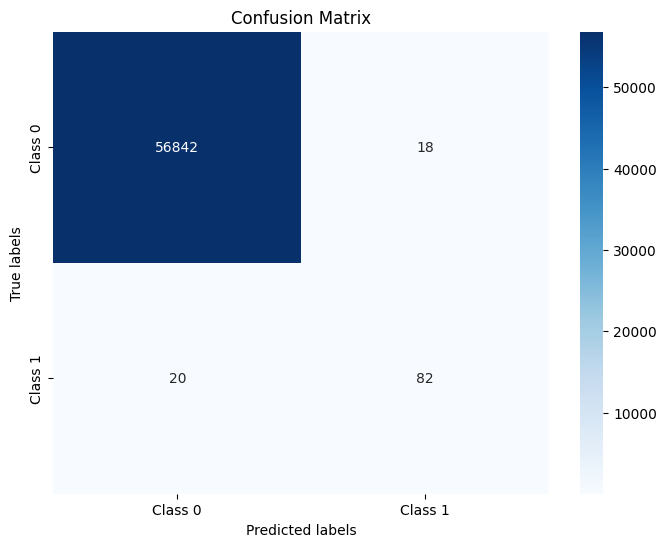

Accuracy: 0.9993328885923949
Precision: 0.82
Recall: 0.803921568627451
F1 Score: 0.8118811881188118


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Assuming y_test and y_pred are defined
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Define class names
class_names = ['Class 0', 'Class 1']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)

# Print metrics
acc_cm = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_cm}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8837209302325582
Recall: 0.7450980392156863
F1 Score: 0.8085106382978724


In [ ]:

def learning_curve(history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history['accuracy'])
    plt.plot(epoch_range,history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.ylabel('epoch')
    plt.legend(['Trian','val'],loc='upper left')
    plt.show()

In [ ]:
 model1=tf.keras.models.Sequential()
 model1.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(29, 1)))
 model1.add(tf.keras.layers.BatchNormalization())
 model1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
 model1.add(tf.keras.layers.Dropout(0.2))
 model1.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(29, 1)))
 model1.add(tf.keras.layers.BatchNormalization())

 model1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
 model1.add(tf.keras.layers.Dropout(0.3))  
 model1.add(tf.keras.layers.Flatten())         
 model1.add(tf.keras.layers.Dense(units=64, activation='relu'))  
 model1.add(tf.keras.layers.Dropout(0.3)) 
 model1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  
 opt= tf.keras.optimizers.Adam(learning_rate=0.0001)
 model1.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy']) 



C:\Users\M S I\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 14, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# convert model weights to bfloat16 data type
policy = tf.keras.mixed_precision. Policy( 'mixed_bfloat16')
tf.keras.mixed_precision.set_global_policy (policy)
# convert input data to bfloat16 data type
X_train_bfloat = tf.convert_to_tensor (X_train, dtype=tf.bfloat16)


In [ ]:
X_train_bfloat.shape
type(X_train_bfloat)


tensorflow.python.framework.ops.EagerTensor

In [ ]:
#convert test data to bfloat16 data type
X_test_bfloat = tf.convert_to_tensor (X_test, dtype=tf.bfloat16)
import time
start_time1 = time.process_time()
history1 = model1.fit(X_train_bfloat,y_train, epochs=10, validation_data=(X_test_bfloat,y_test))
end_time1 = time.process_time()  
cpu_time = end_time1- start_time1
print("CPU time:", cpu_time)



Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9994 - loss: 0

In [ ]:
cpu_time = end_time1 - start_time1
print("CPU time:", cpu_time)
# Get the predictions
y_pred_prob1 = model.predict(X_test_bfloat)

# If it's a binary classification, you might need to threshold the probabilities
y_pred1 = (y_pred_prob > 0.5).astype(int)

# For multi-class classification, you use argmax to get the class with the highest probability
# y_pred = np.argmax(y_pred_prob, axis=1)

print(y_pred1[561], y_test[561])


CPU time: 124.90625
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step
[0] 0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test,y_pred1)
print(cm)
acc_cm = accuracy_score(y_test,y_pred1)
print(acc_cm)


[[56853     7]
 [   23    79]]
0.9994733330992591


In [ ]:

precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

print("Precision (bfloat16):", precision1)
print("Recall (bfloat16):", recall1)
print("F1 Score (bfloat16):", f1_1)


Precision (bfloat16): 0.9186046511627907
Recall (bfloat16): 0.7745098039215687
F1 Score (bfloat16): 0.8404255319148937


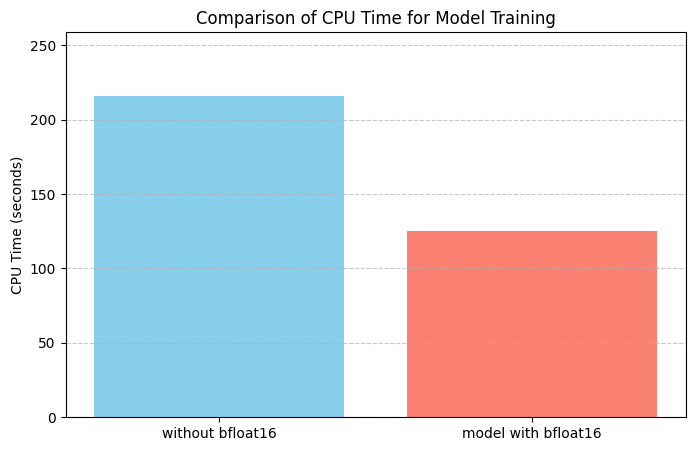

In [ ]:
import matplotlib.pyplot as plt
labels = ['without bfloat16', 'model with bfloat16']
times = [cpu_time2, cpu_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['skyblue', 'salmon'])
plt.ylabel('CPU Time (seconds)')
plt.title('Comparison of CPU Time for Model Training')
plt.ylim(0, max(times) * 1.2)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
def learning_curve(history1,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history1['accuracy1'])
    plt.plot(epoch_range,history1['validation_data'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy1')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    plt.plot(epoch_range,history1.history1['loss'])
    plt.plot(epoch_range,history1.history1['validation_data'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.ylabel('epoch')
    plt.legend(['Trian','val'],loc='upper left')
    plt.show()